In [1]:
import tensorflow as tf
import innvestigate
import rasterio
import numpy as np
from rasterio.plot import reshape_as_image
import glob
import geopandas as gpd
from tensorflow.keras import models
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

2023-03-31 12:33:59.374179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib::/usr/lib/jvm/java-11-openjdk-amd64/lib/server:/opt/hadoop/lib/native:/usr/local/lib/R/lib:/usr/local/grass82/lib
2023-03-31 12:33:59.374199: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
img_path = 'Input/sentinel/patches_256/Iowa_July_1_31/test/Iowa_2021_july_1280-3072.tif'
file = rasterio.open(img_path)
img = reshape_as_image(file.read())
# file.close()
img_batch1 = np.expand_dims(img, axis=0)

img_batch = img_batch1[:,:,:,0:12]
model_id1 = "aanaxs4g" # With mask
model_id = "ezb3xkqf" # No Mask
model_path = glob.glob("wandb/"+ "*"+model_id+"*" + "/files/model-best.h5")[0]
model_path1 = glob.glob("wandb/"+ "*"+model_id1+"*" + "/files/model-best.h5")[0]

ev_gdf = gpd.read_file("Output/Evaluation/"+model_id+".shp")
ev_gdf1 = gpd.read_file("Output/Evaluation/"+model_id1+".shp")

# print(model_path)
cnn_model = models.load_model(model_path)
cnn_model_masked = models.load_model(model_path1)

2023-03-31 12:34:05.702379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib::/usr/lib/jvm/java-11-openjdk-amd64/lib/server:/opt/hadoop/lib/native:/usr/local/lib/R/lib:/usr/local/grass82/lib
2023-03-31 12:34:05.702410: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-31 12:34:05.702422: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f48ff9766d50): /proc/driver/nvidia/version does not exist
2023-03-31 12:34:05.702720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow 

# LRP sequential preset a flat

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


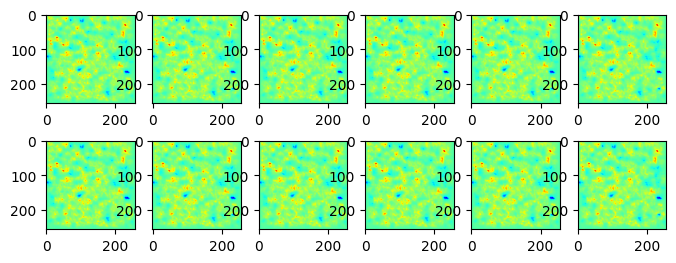

In [3]:
analyzer = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", cnn_model)
a = analyzer.analyze(img_batch)
a1 = a[0] 
channels = 12
fig,ax = plt.subplots(2,6,figsize=(8,3))
ax[0,0].imshow(a[0][:,:,0],cmap="jet")
ax[0,1].imshow(a[0][:,:,1],cmap="jet")
ax[0,2].imshow(a[0][:,:,2],cmap="jet")
ax[0,3].imshow(a[0][:,:,3],cmap="jet")
ax[0,4].imshow(a[0][:,:,4],cmap="jet")
ax[0,5].imshow(a[0][:,:,5],cmap="jet")
ax[1,0].imshow(a[0][:,:,6],cmap="jet")
ax[1,1].imshow(a[0][:,:,7],cmap="jet")
ax[1,2].imshow(a[0][:,:,8],cmap="jet")
ax[1,3].imshow(a[0][:,:,9],cmap="jet")
ax[1,4].imshow(a[0][:,:,10],cmap="jet")
ax[1,5].imshow(a[0][:,:,11],cmap="jet")

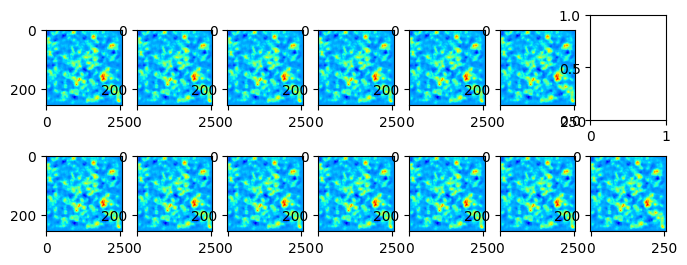

In [4]:
analyzer_masked = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", cnn_model_masked)
a_masked = analyzer_masked.analyze(img_batch1)
a1_masked = a_masked[0] 
channels = 12
fig,ax = plt.subplots(2,7,figsize=(8,3))
ax[0,0].imshow(a_masked[0][:,:,0],cmap="jet")
ax[0,1].imshow(a_masked[0][:,:,1],cmap="jet")
ax[0,2].imshow(a_masked[0][:,:,2],cmap="jet")
ax[0,3].imshow(a_masked[0][:,:,3],cmap="jet")
ax[0,4].imshow(a_masked[0][:,:,4],cmap="jet")
ax[0,5].imshow(a_masked[0][:,:,5],cmap="jet")
ax[1,0].imshow(a_masked[0][:,:,6],cmap="jet")
ax[1,1].imshow(a_masked[0][:,:,7],cmap="jet")
ax[1,2].imshow(a_masked[0][:,:,8],cmap="jet")
ax[1,3].imshow(a_masked[0][:,:,9],cmap="jet")
ax[1,4].imshow(a_masked[0][:,:,10],cmap="jet")
ax[1,5].imshow(a_masked[0][:,:,11],cmap="jet")
ax[1,6].imshow(a_masked[0][:,:,12],cmap="jet")

In [5]:
# Aggregate along color channels and normalize to [-1, 1]

a1_masked = a1_masked.sum(axis=np.argmax(np.asarray(a1_masked.shape) == 13))
a1_masked /= np.max(np.abs(a1_masked))
print(a1_masked.shape)
a1 = a1.sum(axis=np.argmax(np.asarray(a1.shape) == 12))
a1 /= np.max(np.abs(a1))
print(a1.shape)

(256, 256)
(256, 256)


Text(0.5, 1.0, 'Without Mask Layer')

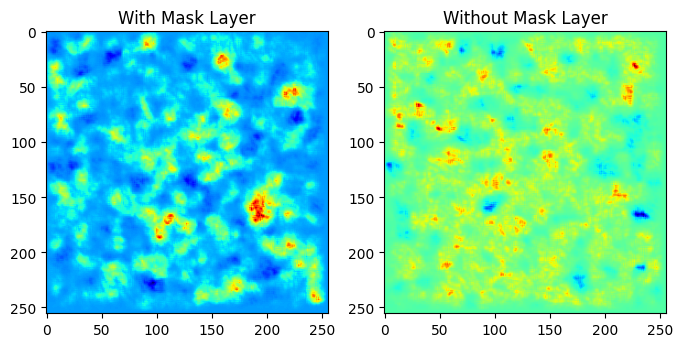

In [6]:
fig,ax = plt.subplots(1,2,figsize = (8,8))
ax[0].imshow(a1_masked, cmap="jet")
ax[0].set_title("With Mask Layer") 
ax[1].imshow(a1, cmap="jet")
ax[1].set_title("Without Mask Layer") 

# LRP sequential preset b flat 

In [7]:
analyzer = innvestigate.create_analyzer("lrp.sequential_preset_b_flat", cnn_model)
a = analyzer.analyze(img_batch)
a1_lrpb = a[0] 
analyzer_masked = innvestigate.create_analyzer("lrp.sequential_preset_b_flat", cnn_model_masked)
a_masked = analyzer_masked.analyze(img_batch1)
a1_masked_lrpb = a_masked[0] 

In [8]:
# Aggregate along color channels and normalize to [-1, 1]

a1_masked_lrpb = a1_masked_lrpb.sum(axis=np.argmax(np.asarray(a1_masked_lrpb.shape) == 13))
a1_masked_lrpb /= np.max(np.abs(a1_masked_lrpb))
print(a1_masked_lrpb.shape)
a1_lrpb = a1_lrpb.sum(axis=np.argmax(np.asarray(a1_lrpb.shape) == 12))
a1_lrpb /= np.max(np.abs(a1_lrpb))
print(a1_lrpb.shape)

(256, 256)
(256, 256)


Text(0.5, 1.0, 'Without Mask Layer')

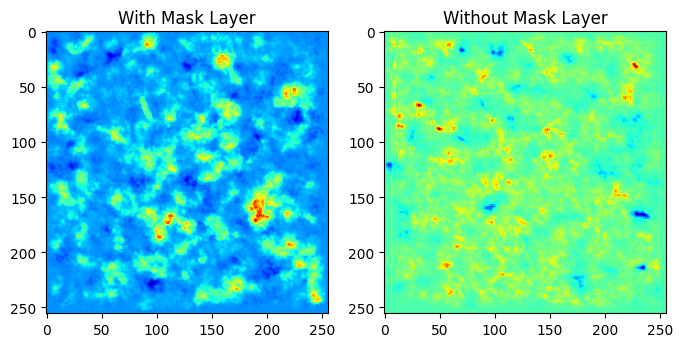

In [9]:
fig,ax = plt.subplots(1,2,figsize = (8,8))
ax[0].imshow(a1_masked_lrpb, cmap="jet")
ax[0].set_title("With Mask Layer") 
ax[1].imshow(a1_lrpb, cmap="jet")
ax[1].set_title("Without Mask Layer") 

# Guided Back Propagation

In [10]:
analyzer = innvestigate.create_analyzer("guided_backprop", cnn_model)
a = analyzer.analyze(img_batch)
a1_gbp = a[0] 
analyzer_masked = innvestigate.create_analyzer("guided_backprop", cnn_model_masked)
a_masked = analyzer_masked.analyze(img_batch1)
a1_masked_gbp = a_masked[0] 

In [11]:
# Aggregate along color channels and normalize to [-1, 1]

a1_masked_gbp = a1_masked_gbp.sum(axis=np.argmax(np.asarray(a1_masked_gbp.shape) == 13))
a1_masked_gbp /= np.max(np.abs(a1_masked_gbp))
print(a1_masked_gbp.shape)
a1_gbp = a1_gbp.sum(axis=np.argmax(np.asarray(a1_gbp.shape) == 12))
a1_gbp /= np.max(np.abs(a1_gbp))
print(a1_gbp.shape)

(256, 256)
(256, 256)


Text(0.5, 1.0, 'Without Mask Layer')

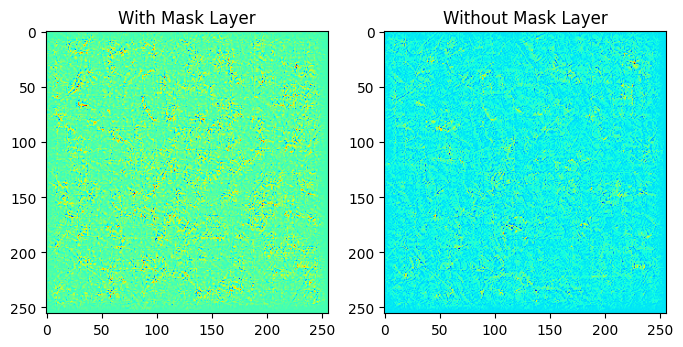

In [12]:
fig,ax = plt.subplots(1,2,figsize = (8,8))
ax[0].imshow(a1_masked_gbp, cmap="jet")
ax[0].set_title("With Mask Layer") 
ax[1].imshow(a1_gbp, cmap="jet")
ax[1].set_title("Without Mask Layer") 

In [14]:
def get_saliency_maps(method_name,model,input_img,no_channels):
    analyzer = innvestigate.create_analyzer(method_name, model)
    a = analyzer.analyze(input_img)
    a1 = a[0] 
    a1 = a1.sum(axis=np.argmax(np.asarray(a1.shape) == no_channels))
    a1 /= np.max(np.abs(a1))
    return a1

In [15]:
lrp_a  = get_saliency_maps("lrp.sequential_preset_a_flat", cnn_model,img_batch,12)
lrp_a_masked  = get_saliency_maps("lrp.sequential_preset_a_flat", cnn_model_masked,img_batch1,13)
lrp_b  = get_saliency_maps("lrp.sequential_preset_b_flat", cnn_model,img_batch,12)
lrp_b_masked  = get_saliency_maps("lrp.sequential_preset_b_flat", cnn_model_masked,img_batch1,13)
gbp  = get_saliency_maps("guided_backprop", cnn_model,img_batch,12)
gbp_masked  = get_saliency_maps("guided_backprop", cnn_model_masked,img_batch1,13)
grad  = get_saliency_maps("gradient", cnn_model,img_batch,12)
grad_masked  = get_saliency_maps("gradient", cnn_model_masked,img_batch1,13)
smoothgrad  = get_saliency_maps("smoothgrad", cnn_model,img_batch,12)
smoothgrad_masked  = get_saliency_maps("smoothgrad", cnn_model_masked,img_batch1,13)
input_t_gradient  = get_saliency_maps("input_t_gradient", cnn_model,img_batch,12)
input_t_gradient_masked  = get_saliency_maps("input_t_gradient", cnn_model_masked,img_batch1,13)
deep_taylor  = get_saliency_maps("deep_taylor", cnn_model,img_batch,12)
deep_taylor_masked  = get_saliency_maps("deep_taylor", cnn_model_masked,img_batch1,13)
integrated_gradients  = get_saliency_maps("integrated_gradients", cnn_model,img_batch,12)
integrated_gradients_masked  = get_saliency_maps("integrated_gradients", cnn_model_masked,img_batch1,13)

In [16]:
saliency_dict = {"lrp_a":{"mask":lrp_a_masked,
                         "no_mask":lrp_a},
                "lrp_b":{"mask":lrp_b_masked,
                        "no_mask":lrp_b},
                 "gbp":{"mask":gbp_masked,
                        "no_mask":gbp},
                 "grad":{"mask":grad_masked,
                        "no_mask":grad},
                 "smoothgrad":{"mask":smoothgrad_masked,
                        "no_mask":smoothgrad},
                 "input_t_gradient":{"mask":input_t_gradient_masked,
                        "no_mask":input_t_gradient},
                 "deep_taylor":{"mask":deep_taylor_masked,
                        "no_mask":deep_taylor},
                  "integrated_gradients":{"mask":integrated_gradients_masked,
                        "no_mask":integrated_gradients},
                }

In [17]:
def plot_saliency(ax,row_no,method_name):
    ax[row_no,0].set_ylabel(method_name, rotation=90, size='large')
    ax[row_no,0].imshow(saliency_dict[method_name]["mask"], cmap="jet")
    # ax[row_no,0].axis("off")
    # ax[row_no,0].set_title("With Mask Layer") 
    ax[row_no,1].imshow(saliency_dict[method_name]["no_mask"], cmap="jet")
    # ax[row_no,1].axis("off")
    # ax[row_no,1].set_title("Without Mask Layer") 

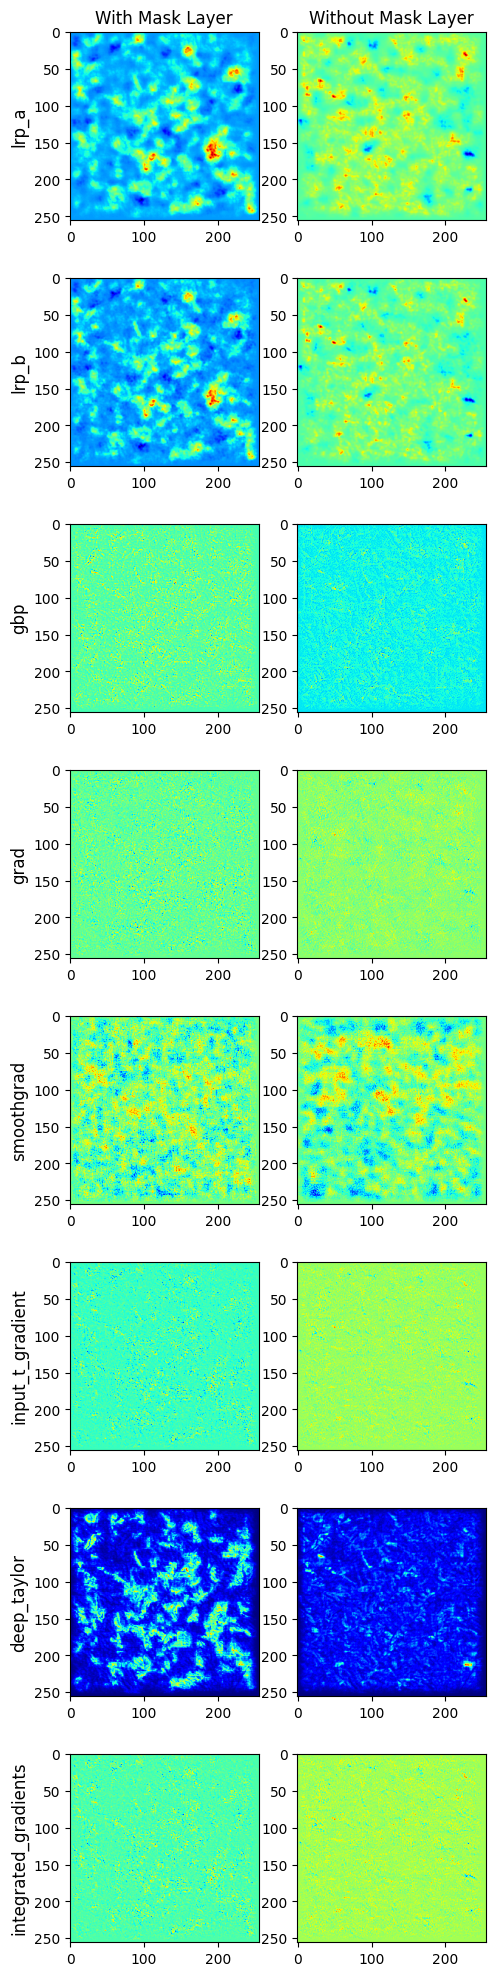

In [18]:
fig,ax = plt.subplots(8,2,figsize = (5,20))
ax[0,0].set_title("With Mask Layer")
ax[0,1].set_title("Without Mask Layer")

plot_saliency(ax,0,"lrp_a")
plot_saliency(ax,1,"lrp_b")
plot_saliency(ax,2,"gbp")
plot_saliency(ax,3,"grad")
plot_saliency(ax,4,"smoothgrad")
plot_saliency(ax,5,"input_t_gradient")
plot_saliency(ax,6,"deep_taylor")
plot_saliency(ax,7,"integrated_gradients")

plt.savefig("Saliency_maps.png")
fig.tight_layout()